## Load Craig's list Data
This data file was downloaded from kaggle.com and was created by user Austin Reese. Below is his description of the data
site: https://www.kaggle.com/austinreese/craigslist-carstrucks-data


"This data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories. For ML projects, consider feature engineering on location columns such as long/lat. For previous listings, check older versions of the dataset."

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Get Path
os.getcwd()
basepath = os.getcwd()
lis_dir = os.listdir()
print('Got Path')

# Create the list of file names: filenames
file ='vehicles.csv'
sub_file = 'data'
file_name_path = os.path.join(basepath, sub_file, file)

print('Created Path')

Got Path
Created Path


In [3]:
auto_data= pd.read_csv(file_name_path)

#Open data
auto_data.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [4]:
auto_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            539759 non-null  int64  
 1   url           539759 non-null  object 
 2   region        539759 non-null  object 
 3   region_url    539759 non-null  object 
 4   price         539759 non-null  int64  
 5   year          538772 non-null  float64
 6   manufacturer  516175 non-null  object 
 7   model         531746 non-null  object 
 8   condition     303707 non-null  object 
 9   cylinders     321264 non-null  object 
 10  fuel          536366 non-null  object 
 11  odometer      440783 non-null  float64
 12  title_status  536819 non-null  object 
 13  transmission  535786 non-null  object 
 14  vin           315349 non-null  object 
 15  drive         383987 non-null  object 
 16  size          168550 non-null  object 
 17  type          392290 non-null  object 
 18  pain

## Variables drop
| Variable   | Reason |
|------|------|
| url   | _We will not be using urls in this study_ |
| region_url | _Region and region_url are the same except one is a url_|
| image_url |  _We do not need photos at the moment this can be checked_ |
| county  |   _there is no non 0 data points there |




In [5]:
#auto_data= auto_data.drop(columns=['url', 'region_url', 'image_url', 'county'], axis=1)
print(auto_data.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')


## Dropped Due to Missing Data
| Variable   | Reason |
|------|------|
|  condition  |  _if condition is unknown from wreck to clean we don't need it_ |
|  year  |  _if we don't know model year we don't know age_ |
|  odometer  |  _odometer measures mileage and if we don't know the mileage we definately don't know the price_ |
|  model  |  _we don't know the model car we don't know the car_ |
|  price  |  _we don't know the price we can't explain anything_ |


In [6]:
#known main points for an auto sale condition, age, mileage, type of car if the cars don't have it we don't want it
auto_data = auto_data[auto_data['condition'].notna()]  
auto_data = auto_data[auto_data['year'].notna()]  
auto_data = auto_data[auto_data['odometer'].notna()] 
auto_data = auto_data[auto_data['model'].notna()]  
auto_data = auto_data[auto_data['price'].notna()]  


## Data is unreliable
1. Mileage
2. Price
3. Age

In [7]:
print(f"Maximum mileage: {auto_data.odometer.max()} \nMinimum mileage: {auto_data.odometer.min()} ")
# If we are dealing with a vehicle with over a half milion miles we have more problem

auto_data = auto_data[(auto_data.odometer< 500000)] 



Maximum mileage: 10000000.0 
Minimum mileage: 0.0 


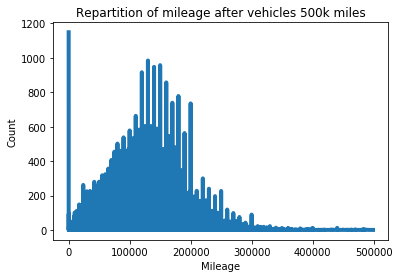

In [8]:
auto_data.odometer.value_counts().sort_index().plot(lw = 4)
plt.title("Repartition of mileage after vehicles 500k miles")
plt.xlabel("Mileage")
plt.ylabel("Count")
plt.show()

In [9]:
print(f"Maximum price: $ {auto_data.price.max()} \nMinimum price: $ {auto_data.price.min()} ")

#None of the vehicles we have even brand new have a value of half a milion
#We will also delete the cars with a price less than $100, because it might be a mistake if the price is so low.
auto_data = auto_data[(auto_data.price >= 100) & (auto_data.price <= 500000)]


Maximum price: $ 4198286601 
Minimum price: $ 0 


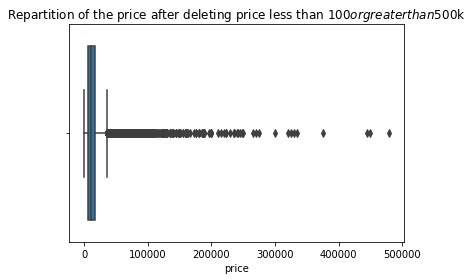

In [10]:
#Chart price
sns.boxplot(auto_data.price)
plt.title("Repartition of the price after deleting price less than $100 or greater than $500k")
plt.show()

In [11]:
#Variables needed age
auto_data['age'] = 2020-auto_data['year']
print(f"Maximum age:  {auto_data.age.max()} years \nMinimum age: {auto_data.age.min()} years ")

#We do not need to take into consideration vehicles older than 10 years old. The vehicles we particular looking for
auto_data = auto_data[auto_data.age < 11]
auto_data = auto_data[auto_data.age > -1]

Maximum age:  2020.0 years 
Minimum age: -1.0 years 


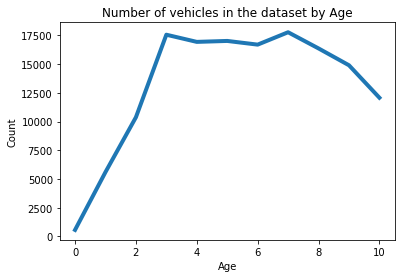

In [12]:
#Chart Age
auto_data.age.value_counts().sort_index().plot(lw = 4)
plt.title("Number of vehicles in the dataset by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## Removed Due to Condition
For our analysis, we are looking at cars in good condition
we don't want to consider cars which have the condition/status:
1. salvage
2. lien
3. missing
4. parts only

Therefore, we will delete those vehicles

In [13]:
idx1 = auto_data[auto_data["condition"] == "salvage"].index

for w in ["salvage","lien","missing","parts only"]:
    idx2 = auto_data[auto_data["title_status"] == w].index
    idx1 = idx1.union(idx2)
    
auto_data.drop(idx1, axis = 0, inplace = True)

In [14]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142141 entries, 2 to 539744
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            142141 non-null  int64  
 1   url           142141 non-null  object 
 2   region        142141 non-null  object 
 3   region_url    142141 non-null  object 
 4   price         142141 non-null  int64  
 5   year          142141 non-null  float64
 6   manufacturer  139156 non-null  object 
 7   model         142141 non-null  object 
 8   condition     142141 non-null  object 
 9   cylinders     103645 non-null  object 
 10  fuel          142131 non-null  object 
 11  odometer      142141 non-null  float64
 12  title_status  142135 non-null  object 
 13  transmission  142009 non-null  object 
 14  vin           103837 non-null  object 
 15  drive         118451 non-null  object 
 16  size          56922 non-null   object 
 17  type          127089 non-null  object 
 18  pain

## Converting to Numeric
We want to convert data that can be easily viewed as numerical as numerical.

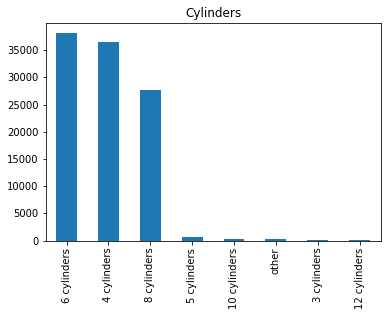

In [15]:
#See Status of Cylinders

auto_data.cylinders.value_counts().plot.bar()
plt.title("Cylinders")
plt.show()

In [16]:
#Turn Cylinder column from string to numeric
auto_data['cyl'] = auto_data['cylinders']
auto_data['cyl'] = auto_data['cyl'].replace('other', np.nan)
auto_data['cyl'] = auto_data['cyl'].astype(str).str[0:2]
auto_data['cyl'] = auto_data['cyl'].str.strip()
auto_data['cyl'] = auto_data['cyl'].replace('na', np.nan)
auto_data['cyl'] = pd.to_numeric(auto_data['cyl'])
auto_data['cylinders']= auto_data['cyl']
auto_data= auto_data.drop(['cyl'], axis=1)

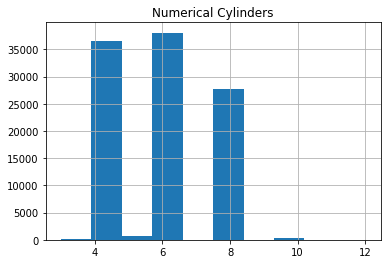

In [17]:
#Plot Cylinders
plt.title("Numerical Cylinders")
hist = auto_data.cylinders.hist(bins=10)

## Save File as auto_data.csv

In [18]:
#Save Data

sub_file = 'data'
new_file = 'auto_data.csv'
new_file_name_path = os.path.join(basepath,sub_file, new_file)
auto_data.to_csv(new_file_name_path, index=False)




## Get Categorical Data
We want data on what segment the vehicle is in as that might change the prices signicantly.
We got this data from back4app an open data source.
Website: https://www.back4app.com/database/back4app/car-make-model-dataset

In [20]:
import urllib
import requests
import json

In [21]:


where = urllib.parse.quote_plus("""
{
    "Category": {
        "$exists": true
    },
    "Year": {
        "$gte": 2010
    }
}
""")
url = 'https://parseapi.back4app.com/classes/Carmodels_Car_Model_List?limit=5000&where=%s' % where
headers = {
    'X-Parse-Application-Id': 'pozCwVISt2yfzi2wJjwo0JiMIJclsUAOchP4AuJO', # This is your app's application id
    'X-Parse-REST-API-Key': 'Jtc8r91VIJOizG8ReKkaseZcugQjAx4vG1WKbJye' # This is your app's REST API key
}
data_json = json.loads(requests.get(url, headers=headers).content.decode('utf-8')) # Here you have the data that you need


#import collections

## Convert Categorical Data into data frame

In [22]:
#the above data was too nested a dictionaries listed in a list that was in a list that was a dictionary
print(type(data_json))
list_values = [ v for v in data_json.values() ] #undoes dictionary

list_value_items = [y for x in list_values for y in x] # undoes list

cat_data = pd.DataFrame.from_dict(list_value_items) #turns list of dictionaries into data frame

#we don't need object id or created at
cat_data= cat_data.drop(['objectId', 'createdAt'], axis=1)
print(cat_data.head())
cat_data.describe()


<class 'dict'>
   Year       Make         Model            Category                 updatedAt
0  2020       Audi            Q3                 SUV  2020-01-27T20:44:17.665Z
1  2020   Cadillac  Escalade ESV                 SUV  2020-01-27T20:44:17.665Z
2  2020  Chevrolet        Malibu               Sedan  2020-01-27T20:44:17.665Z
3  2020  Chevrolet      Corvette  Coupe, Convertible  2020-01-27T20:44:17.665Z
4  2020      Acura           RLX               Sedan  2020-01-27T20:44:17.665Z


,Year
count,4082.000000
mean,2015.034052
std,3.028828
min,2010.000000
25%,2012.000000
50%,2015.000000
75%,2018.000000
max,2020.000000


## Save Categorical Data

In [23]:

sub_file = 'data'
new_file = 'cat_data.csv'
new_file_name_path = os.path.join(basepath,sub_file, new_file)
cat_data.to_csv(new_file_name_path, index=False)

## Find MSRP data
The original price of the car will heavily effect the older price. Let's bring that out.
This data is a downloaded file from https://www.kaggle.com/CooperUnion/cardataset . This data was obtained by scraping edmunds (a car rating website) and twitter.

In [24]:
# Create the list of file names: filenames
file ='msrp.csv'
sub_file = 'data'
file_name_path = os.path.join(basepath, sub_file, file)
msrp_data= pd.read_csv(file_name_path)

#Open data
msrp_data.head(5)


p
y


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
